# Prática 04 - Utilização de MLP

## Descrição: Utilização da técnica Multi-Layer Perceptron. Observação: utilizar as mesmas bases da tarefa anterior e extrair os resultados dos experimentos.

### Autores: Mariana Emerenciano Miranda, Arthur Ferreira de Holanda, Artur Revoredo Pinto

#Introdução

Visando exercitar os conceitos aprendidos nas aulas de Modelos Supervisionados, execute experimentos com a técnica Multi Layer Perceptron (MLP), de tal forma que você possa escolher diferentes valores para alguns parâmetros pertencentes à técnica em questão.

# Descrição da atividade

Utilize a técnica Multilayer Perceptron (MLP) através da implementação
sklearn.neural_network.MLPClassifier da seguinte forma:
1. Fixe uma das funções de ativação (‘identity’, ‘logistic’, ‘tanh’, ‘relu’);
2. Varie o valor do solver entre: 'sgd', 'adam';
3. Varie a quantidade de neurônios da camada escondida (hidden_layer_sizes) de acordo com a metodologia
mostrada na aula prática de MLP, que envolve o número de atributos e a quantidade de classes em seu
dataset;
4. Varie a taxa de aprendizado (learning_rate_init) entre os seguintes valores: .001, 0.01, 0.1, ou qualquer
outro conjunto de possíveis valores;
5. Por último, varie o número de iterações (500, 1000, 1500, etc).
Note que você pode fazer uso de um GridSearch capaz de buscar valores dentro do espaço de busca
delimitado por todos os valores dos parâmetros citado (ver slide 18 da aula prática).


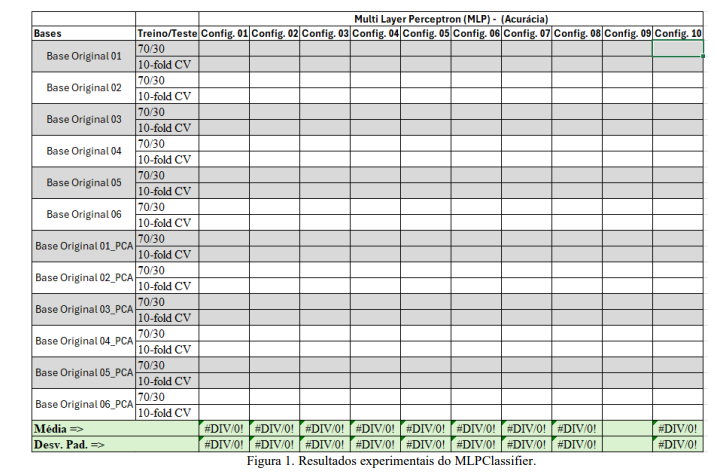

Além dos itens acima, utilize a mesma metodologia de experimentos para todas as bases (descrita na Figura 1).

# Carregando as bases HOG e CNN

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Bibliotecas básicas
import numpy as np
import pandas as pd
import os
import io
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import cv2

In [ ]:
def divisao_holdout(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features_base_original = base_original[colunas_numericas]
  labels_base_original = base_original['label']

  X_train, X_test, y_train, y_test = train_test_split(features_base_original, labels_base_original, test_size=0.3, random_state=42)
  return X_train, X_test, y_train, y_test


In [ ]:
def divisao_X_e_y(base_original):
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = base_original.select_dtypes(include=tipos_numericos)
  colunas_numericas = list(cols_num.columns)

  features= base_original[colunas_numericas]
  labels = base_original['label']

  return features, labels

In [ ]:
hog_128_16_pca = pd.read_csv('/content/CSVs PCA/hog_128_16_PCA-10.csv')

In [ ]:
hog_128_20 = pd.read_csv('/content/CSVs/hog_features_128_20.csv')

In [ ]:
hog_256_16_pca = pd.read_csv('/content/CSVs PCA/hog_256_16_PCA-10.csv')

In [ ]:
hog_256_20_pca = pd.read_csv('/content/CSVs PCA/hog_256_20_PCA-10.csv')

In [ ]:
cnn_vgg16_128_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_128.csv')

In [ ]:
cnn_vgg16_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG16_max_128_PCA-10.csv')

In [ ]:
cnn_vgg16_256_avg = pd.read_csv('/content/CSVs/cnn_VGG16_avg_256.csv')

In [ ]:
cnn_vgg16_256_max = pd.read_csv('/content/CSVs/cnn_VGG16_max_256.csv')

In [ ]:
cnn_vgg19_128_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_128.csv')

In [ ]:
cnn_vgg19_128_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_max_128_PCA-10.csv')

In [ ]:
cnn_vgg19_256_avg = pd.read_csv('/content/CSVs/cnn_VGG19_avg_256.csv')

In [ ]:
cnn_vgg19_256_max_pca = pd.read_csv('/content/CSVs PCA/cnn_VGG19_256_max_PCA-10.csv')

In [ ]:
# Features e labels
features_hog_128_16_pca, labels_hog_128_16_pca = divisao_X_e_y(hog_128_16_pca)

features_hog_128_20, labels_hog_128_20 = divisao_X_e_y(hog_128_20)

features_hog_256_20_pca, labels_hog_256_20_pca = divisao_X_e_y(hog_256_20_pca)

features_hog_256_16_pca, labels_hog_256_16_pca = divisao_X_e_y(hog_256_16_pca)

In [ ]:
X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20 = divisao_holdout(hog_128_20)

X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca = divisao_holdout(hog_128_16_pca)

X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca = divisao_holdout(hog_256_16_pca)

X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca = divisao_holdout(hog_256_20_pca)

In [ ]:
features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca = divisao_X_e_y(cnn_vgg16_128_max_pca)

features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca = divisao_X_e_y(cnn_vgg19_128_max_pca)

features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca = divisao_X_e_y(cnn_vgg19_256_max_pca)

features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg = divisao_X_e_y(cnn_vgg16_128_avg)
features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg = divisao_X_e_y(cnn_vgg16_256_avg)
features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max = divisao_X_e_y(cnn_vgg16_256_max)

features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg = divisao_X_e_y(cnn_vgg19_128_avg)
features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg = divisao_X_e_y(cnn_vgg19_256_avg)

In [ ]:
X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca = divisao_holdout(cnn_vgg16_128_max_pca)

X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca = divisao_holdout(cnn_vgg19_128_max_pca)

X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca = divisao_holdout(cnn_vgg19_256_max_pca)

X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg = divisao_holdout(cnn_vgg16_128_avg)
X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg = divisao_holdout(cnn_vgg16_256_avg)
X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max = divisao_holdout(cnn_vgg16_256_max)

X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg = divisao_holdout(cnn_vgg19_128_avg)
X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg = divisao_holdout(cnn_vgg19_256_avg)


# Grid Search

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

def running_config1(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config1_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config1_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))


time: 5.72 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config2(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config2_param_grid = {
    'activation': ['relu'],
    'solver': ['adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config2_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 1.43 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config3(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config3_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config3_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 1.3 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config4(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config4_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1] * 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config4_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 5.32 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config5(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config5_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config5_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 9.05 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config6(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config6_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd','adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config6_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 1.31 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config7(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config7_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.01],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config7_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 5 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config8(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config8_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd','adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.1],
    'max_iter': [500, 1000, 1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config8_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 19.7 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config9(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config9_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd','adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config9_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 1.62 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config10(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config10_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd','adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1000],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config10_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 1.75 ms (started: 2025-01-03 11:01:54 +00:00)


In [ ]:
def running_config11(X_train, X_test, y_train, y_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  config11_param_grid = {
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'hidden_layer_sizes': [
        (X_train.shape[1],),
        (X_train.shape[1] * 2,),
        (X_train.shape[1] // 2,)
    ],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [1500],
    'random_state': [42]
  }

  mlp = MLPClassifier()
  grid_search = GridSearchCV(estimator=mlp, param_grid=config11_param_grid, cv=3, scoring='accuracy', verbose=2)


  grid_search.fit(X_train, y_train)


  print("Melhores parâmetros encontrados:")
  print(grid_search.best_params_)


  y_pred = grid_search.best_estimator_.predict(X_test)
  print("\nRelatório de Classificação:")
  print(classification_report(y_test, y_pred))

time: 6.02 ms (started: 2025-01-03 11:01:54 +00:00)


## Explicação breve sobre os resultados do Grid Search

O grid search foi rodado em outro colab para as bases CNN_VGG16_256_AVG e HOG_128_20. Com esse resultado, escolhemos as seguintes configurações:

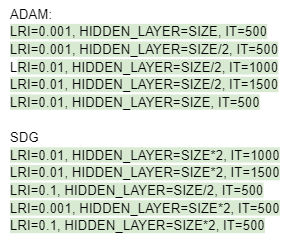

# As 10 configurações

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

time: 613 µs (started: 2025-01-04 17:27:40 +00:00)


In [ ]:
#Configuração 1
#Função de ativação: ReLU
#Solver: Adam
#Learning Rate Init: 0.001
#Hidden Layer Size: SIZE
#Max Iterations: 500

def evaluating_config1(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1], activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 775 µs (started: 2025-01-04 17:27:40 +00:00)


In [ ]:
#Configuração 2
#Função de ativação: ReLU
#Solver: Adam
#Learning Rate Init: 0.001
#Hidden Layer Size: SIZE // 2
#Max Iterations: 500

def evaluating_config2(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] // 2, activation='relu', solver='adam', learning_rate_init=0.001, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 631 µs (started: 2025-01-04 17:27:40 +00:00)


In [ ]:
#Configuração 3
#Função de ativação: ReLU
#Solver: Adam
#Learning Rate Init: 0.01
#Hidden Layer Size: SIZE // 2
#Max Iterations: 1000

def evaluating_config3(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] // 2, activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 628 µs (started: 2025-01-04 17:27:40 +00:00)


In [ ]:
#Configuração 4
#Função de ativação: ReLU
#Solver: Adam
#Learning Rate Init: 0.01
#Hidden Layer Size: SIZE // 2
#Max Iterations: 1500

def evaluating_config4(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] // 2, activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 716 µs (started: 2025-01-04 17:27:40 +00:00)


In [ ]:
#Configuração 5
#Função de ativação: ReLU
#Solver: Adam
#Learning Rate Init: 0.01
#Hidden Layer Size: SIZE
#Max Iterations: 500

def evaluating_config5(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1], activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 610 µs (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
#Configuração 6
#Função de ativação: ReLU
#Solver: SDG
#Learning Rate Init: 0.01
#Hidden Layer Size: SIZE * 2
#Max Iterations: 1000

def evaluating_config6(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] * 2, activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 738 µs (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
#Configuração 7
#Função de ativação: ReLU
#Solver: SDG
#Learning Rate Init: 0.01
#Hidden Layer Size: SIZE * 2
#Max Iterations: 1500

def evaluating_config7(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] * 2, activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 677 µs (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
#Configuração 8
#Função de ativação: ReLU
#Solver: SDG
#Learning Rate Init: 0.1
#Hidden Layer Size: SIZE // 2
#Max Iterations: 500

def evaluating_config8(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] // 2, activation='relu', solver='sgd', learning_rate_init=0.1, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 736 µs (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
#Configuração 9
#Função de ativação: ReLU
#Solver: SDG
#Learning Rate Init: 0.001
#Hidden Layer Size: SIZE * 2
#Max Iterations: 500

def evaluating_config9(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] * 2, activation='relu', solver='sgd', learning_rate_init=0.001, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 744 µs (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
#Configuração 10
#Função de ativação: ReLU
#Solver: SDG
#Learning Rate Init: 0.1
#Hidden Layer Size: SIZE * 2
#Max Iterations: 500

def evaluating_config10(X_train, X_test, y_train, y_test, features, labels):
  mlp = MLPClassifier(hidden_layer_sizes= X_train.shape[1] * 2, activation='relu', solver='sgd', learning_rate_init=0.1, max_iter=500)
  mlp.fit(X_train, y_train)

  #Predict the response for test dataset
  y_pred = mlp.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Acurácia (holdout): ",metrics.accuracy_score(y_test, y_pred))

  # Matriz de confusão
  confusion_matrix(y_test, y_pred)

  kf = KFold(n_splits=10, random_state=42, shuffle=True)

  scores = cross_val_score(mlp, features, labels, scoring='accuracy', cv=kf, n_jobs=-1)
  print('Acurácia (tenfold): %.9f (%.9f)' % (mean(scores), std(scores)))

time: 1.05 ms (started: 2025-01-04 17:27:41 +00:00)


# Executando as 10 configurações nos HOGs

## HOG 128 16x16 PCA

In [ ]:
evaluating_config1(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5439330543933054
Acurácia (tenfold): 0.508623418 (0.053464075)
time: 8.63 s (started: 2025-01-04 18:16:57 +00:00)


In [ ]:
evaluating_config2(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.5146443514644351
Acurácia (tenfold): 0.487373418 (0.026941961)
time: 11.1 s (started: 2025-01-04 18:17:05 +00:00)


In [ ]:
evaluating_config3(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.4895397489539749
Acurácia (tenfold): 0.484762658 (0.052059081)
time: 3.97 s (started: 2025-01-04 18:17:16 +00:00)


In [ ]:
evaluating_config4(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.5188284518828452
Acurácia (tenfold): 0.489984177 (0.038335316)
time: 4.4 s (started: 2025-01-04 18:17:20 +00:00)


In [ ]:
evaluating_config5(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.5104602510460251
Acurácia (tenfold): 0.487294304 (0.051028815)
time: 8.32 s (started: 2025-01-04 18:17:25 +00:00)


In [ ]:
evaluating_config6(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5523012552301255
Acurácia (tenfold): 0.517500000 (0.045666388)
time: 19.7 s (started: 2025-01-04 18:17:33 +00:00)


In [ ]:
evaluating_config7(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5439330543933054
Acurácia (tenfold): 0.523860759 (0.028901069)
time: 29.2 s (started: 2025-01-04 18:17:53 +00:00)


In [ ]:
evaluating_config8(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.502092050209205
Acurácia (tenfold): 0.486075949 (0.046355413)
time: 3.41 s (started: 2025-01-04 18:18:22 +00:00)


In [ ]:
evaluating_config9(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5313807531380753
Acurácia (tenfold): 0.492294304 (0.038000720)
time: 8.34 s (started: 2025-01-04 18:18:26 +00:00)


In [ ]:
evaluating_config10(X_train_hog_128_16_pca, X_test_hog_128_16_pca, y_train_hog_128_16_pca, y_test_hog_128_16_pca, features_hog_128_16_pca, labels_hog_128_16_pca)

Acurácia (holdout):  0.4686192468619247
Acurácia (tenfold): 0.474683544 (0.058975024)
time: 7.84 s (started: 2025-01-04 18:18:34 +00:00)


## HOG 128 20x20

In [ ]:
evaluating_config1(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5732217573221757
Acurácia (tenfold): 0.561693038 (0.045939267)
time: 9min 47s (started: 2025-01-04 18:18:42 +00:00)


In [ ]:
evaluating_config2(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5564853556485355
Acurácia (tenfold): 0.554113924 (0.057398251)
time: 5min 34s (started: 2025-01-04 18:28:29 +00:00)


In [ ]:
evaluating_config3(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5230125523012552
Acurácia (tenfold): 0.533955696 (0.051542910)
time: 3min 57s (started: 2025-01-04 18:34:04 +00:00)


In [ ]:
evaluating_config4(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5355648535564853
Acurácia (tenfold): 0.533892405 (0.058224271)
time: 4min 49s (started: 2025-01-04 18:38:02 +00:00)


In [ ]:
evaluating_config5(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5481171548117155
Acurácia (tenfold): 0.531376582 (0.046465786)
time: 8min 10s (started: 2025-01-04 18:42:52 +00:00)


In [ ]:
evaluating_config6(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5774058577405857
Acurácia (tenfold): 0.560427215 (0.051365422)
time: 50min 38s (started: 2025-01-04 18:51:03 +00:00)


In [ ]:
evaluating_config7(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5564853556485355
Acurácia (tenfold): 0.557879747 (0.047480315)
time: 50min 32s (started: 2025-01-04 19:41:41 +00:00)


In [ ]:
evaluating_config8(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5774058577405857
Acurácia (tenfold): 0.572990506 (0.051091380)
time: 2min 44s (started: 2025-01-04 20:32:14 +00:00)


In [ ]:
evaluating_config9(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.602510460251046
Acurácia (tenfold): 0.584319620 (0.049180384)
time: 29min 10s (started: 2025-01-04 20:34:58 +00:00)


In [ ]:
evaluating_config10(X_train_hog_128_20, X_test_hog_128_20, y_train_hog_128_20, y_test_hog_128_20, features_hog_128_20, labels_hog_128_20)

Acurácia (holdout):  0.5815899581589958
Acurácia (tenfold): 0.594414557 (0.050593094)
time: 9min 58s (started: 2025-01-04 21:04:09 +00:00)


## HOG 256 16x16 PCA

In [ ]:
evaluating_config1(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.4769874476987448
Acurácia (tenfold): 0.489778481 (0.066805259)
time: 10.9 s (started: 2025-01-04 21:14:07 +00:00)


In [ ]:
evaluating_config2(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.48535564853556484
Acurácia (tenfold): 0.465822785 (0.062751537)
time: 8.64 s (started: 2025-01-04 21:14:18 +00:00)


In [ ]:
evaluating_config3(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

Acurácia (holdout):  0.5062761506276151
Acurácia (tenfold): 0.463386076 (0.042048151)
time: 3.83 s (started: 2025-01-04 21:14:27 +00:00)


In [ ]:
evaluating_config4(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

Acurácia (holdout):  0.4811715481171548
Acurácia (tenfold): 0.478433544 (0.051410273)
time: 6.23 s (started: 2025-01-04 21:14:30 +00:00)


In [ ]:
evaluating_config5(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

Acurácia (holdout):  0.5481171548117155
Acurácia (tenfold): 0.484825949 (0.056214970)
time: 5.68 s (started: 2025-01-04 21:14:37 +00:00)


In [ ]:
evaluating_config6(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.4686192468619247
Acurácia (tenfold): 0.450901899 (0.059297332)
time: 19.7 s (started: 2025-01-04 21:14:42 +00:00)


In [ ]:
evaluating_config7(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.4895397489539749
Acurácia (tenfold): 0.460886076 (0.049476803)
time: 24.7 s (started: 2025-01-04 21:15:02 +00:00)


In [ ]:
evaluating_config8(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

Acurácia (holdout):  0.502092050209205
Acurácia (tenfold): 0.453354430 (0.040440624)
time: 3.21 s (started: 2025-01-04 21:15:27 +00:00)


In [ ]:
evaluating_config9(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5146443514644351
Acurácia (tenfold): 0.464651899 (0.041333536)
time: 9.14 s (started: 2025-01-04 21:15:30 +00:00)


In [ ]:
evaluating_config10(X_train_hog_256_16_pca, X_test_hog_256_16_pca, y_train_hog_256_16_pca, y_test_hog_256_16_pca, features_hog_256_16_pca, labels_hog_256_16_pca)

Acurácia (holdout):  0.48535564853556484
Acurácia (tenfold): 0.465901899 (0.065897948)
time: 4.12 s (started: 2025-01-04 21:15:39 +00:00)


## HOG 256 20x20 PCA

In [ ]:
evaluating_config1(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5355648535564853
Acurácia (tenfold): 0.525189873 (0.025709937)
time: 11.2 s (started: 2025-01-04 21:15:43 +00:00)


In [ ]:
evaluating_config2(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5062761506276151
Acurácia (tenfold): 0.520000000 (0.037164498)
time: 9.01 s (started: 2025-01-04 21:15:55 +00:00)


In [ ]:
evaluating_config3(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

Acurácia (holdout):  0.5188284518828452
Acurácia (tenfold): 0.517579114 (0.046954841)
time: 6.05 s (started: 2025-01-04 21:16:04 +00:00)


In [ ]:
evaluating_config4(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

Acurácia (holdout):  0.5397489539748954
Acurácia (tenfold): 0.491123418 (0.030342347)
time: 4.04 s (started: 2025-01-04 21:16:10 +00:00)


In [ ]:
evaluating_config5(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

Acurácia (holdout):  0.502092050209205
Acurácia (tenfold): 0.498750000 (0.058773263)
time: 5.71 s (started: 2025-01-04 21:16:14 +00:00)


In [ ]:
evaluating_config6(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5146443514644351
Acurácia (tenfold): 0.512658228 (0.039394159)
time: 21.3 s (started: 2025-01-04 21:16:19 +00:00)


In [ ]:
evaluating_config7(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5397489539748954
Acurácia (tenfold): 0.508908228 (0.049299545)
time: 27.2 s (started: 2025-01-04 21:16:41 +00:00)


In [ ]:
evaluating_config8(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

Acurácia (holdout):  0.5188284518828452
Acurácia (tenfold): 0.501091772 (0.042992777)
time: 1.91 s (started: 2025-01-04 21:17:08 +00:00)


In [ ]:
evaluating_config9(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.5355648535564853
Acurácia (tenfold): 0.514952532 (0.047105695)
time: 11.7 s (started: 2025-01-04 21:17:10 +00:00)


In [ ]:
evaluating_config10(X_train_hog_256_20_pca, X_test_hog_256_20_pca, y_train_hog_256_20_pca, y_test_hog_256_20_pca, features_hog_256_20_pca, labels_hog_256_20_pca)

Acurácia (holdout):  0.5146443514644351
Acurácia (tenfold): 0.507594937 (0.059878026)
time: 4.16 s (started: 2025-01-04 21:17:22 +00:00)


# Executando as 10 configurações nas CNNs

## 1. CNN VGG16 128 AVG

In [ ]:
evaluating_config1(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.3277310924369748
Acurácia (tenfold): 0.353607595 (0.079310667)
time: 1min 21s (started: 2025-01-04 17:27:41 +00:00)


In [ ]:
evaluating_config2(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.3319327731092437
Acurácia (tenfold): 0.366139241 (0.050992051)
time: 45.4 s (started: 2025-01-04 17:29:02 +00:00)


In [ ]:
evaluating_config3(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.2815126050420168
Acurácia (tenfold): 0.315569620 (0.048358127)
time: 29.6 s (started: 2025-01-04 17:29:48 +00:00)


In [ ]:
evaluating_config4(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.2857142857142857
Acurácia (tenfold): 0.320664557 (0.037201531)
time: 29.4 s (started: 2025-01-04 17:30:17 +00:00)


In [ ]:
evaluating_config5(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.3277310924369748
Acurácia (tenfold): 0.333386076 (0.065837085)
time: 58.1 s (started: 2025-01-04 17:30:47 +00:00)


In [ ]:
evaluating_config6(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.205806962 (0.032492777)
time: 29 s (started: 2025-01-04 17:31:45 +00:00)


In [ ]:
evaluating_config7(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.25210084033613445
Acurácia (tenfold): 0.217104430 (0.045718181)
time: 35 s (started: 2025-01-04 17:32:14 +00:00)


In [ ]:
evaluating_config8(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.215933544 (0.040694040)
time: 4.21 s (started: 2025-01-04 17:32:49 +00:00)


In [ ]:
evaluating_config9(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.25630252100840334
Acurácia (tenfold): 0.258860759 (0.032247752)
time: 38.9 s (started: 2025-01-04 17:32:53 +00:00)


In [ ]:
evaluating_config10(X_train_vgg16_128_avg, X_test_vgg16_128_avg, y_train_vgg16_128_avg, y_test_vgg16_128_avg, features_cnn_vgg16_128_avg, labels_cnn_vgg16_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.207072785 (0.042034803)
time: 18.5 s (started: 2025-01-04 17:33:32 +00:00)


## 2. CNN VGG16 128 MAX PCA

In [ ]:
evaluating_config1(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.35294117647058826
Acurácia (tenfold): 0.406613924 (0.044798873)
time: 9.57 s (started: 2025-01-04 17:33:51 +00:00)


In [ ]:
evaluating_config2(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.38235294117647056
Acurácia (tenfold): 0.406661392 (0.066197753)
time: 8.37 s (started: 2025-01-04 17:34:00 +00:00)


In [ ]:
evaluating_config3(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

Acurácia (holdout):  0.35294117647058826
Acurácia (tenfold): 0.414208861 (0.055492011)
time: 3.68 s (started: 2025-01-04 17:34:09 +00:00)


In [ ]:
evaluating_config4(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

Acurácia (holdout):  0.38235294117647056
Acurácia (tenfold): 0.401613924 (0.065244723)
time: 5.78 s (started: 2025-01-04 17:34:12 +00:00)


In [ ]:
evaluating_config5(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

Acurácia (holdout):  0.3865546218487395
Acurácia (tenfold): 0.382642405 (0.060211052)
time: 5.46 s (started: 2025-01-04 17:34:18 +00:00)


In [ ]:
evaluating_config6(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.31512605042016806
Acurácia (tenfold): 0.416708861 (0.058749563)
time: 19.3 s (started: 2025-01-04 17:34:24 +00:00)


In [ ]:
evaluating_config7(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.35714285714285715
Acurácia (tenfold): 0.402848101 (0.052797861)
time: 29.4 s (started: 2025-01-04 17:34:43 +00:00)


In [ ]:
evaluating_config8(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

Acurácia (holdout):  0.3697478991596639
Acurácia (tenfold): 0.399018987 (0.055663325)
time: 2.78 s (started: 2025-01-04 17:35:12 +00:00)


In [ ]:
evaluating_config9(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.3277310924369748
Acurácia (tenfold): 0.419303797 (0.070685748)
time: 11.1 s (started: 2025-01-04 17:35:15 +00:00)


In [ ]:
evaluating_config10(X_train_vgg16_128_max_pca, X_test_vgg16_128_max_pca, y_train_vgg16_128_max_pca, y_test_vgg16_128_max_pca, features_cnn_vgg16_128_max_pca, labels_cnn_vgg16_128_max_pca)

Acurácia (holdout):  0.31932773109243695
Acurácia (tenfold): 0.388892405 (0.062665651)
time: 4.79 s (started: 2025-01-04 17:35:26 +00:00)


## 3. CNN VGG16 256 AVG

In [ ]:
evaluating_config1(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.453781512605042
Acurácia (tenfold): 0.458370253 (0.060379152)
time: 2min 1s (started: 2025-01-04 17:35:31 +00:00)


In [ ]:
evaluating_config2(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.39915966386554624
Acurácia (tenfold): 0.455901899 (0.065715972)
time: 1min 29s (started: 2025-01-04 17:37:33 +00:00)


In [ ]:
evaluating_config3(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.3739495798319328
Acurácia (tenfold): 0.416772152 (0.066972673)
time: 33.5 s (started: 2025-01-04 17:39:03 +00:00)


In [ ]:
evaluating_config4(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.42857142857142855
Acurácia (tenfold): 0.419208861 (0.073782927)
time: 32.5 s (started: 2025-01-04 17:39:36 +00:00)


In [ ]:
evaluating_config5(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.42016806722689076
Acurácia (tenfold): 0.391645570 (0.074753802)
time: 1min 15s (started: 2025-01-04 17:40:09 +00:00)


In [ ]:
evaluating_config6(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.27310924369747897
Acurácia (tenfold): 0.281613924 (0.081753737)
time: 2min 42s (started: 2025-01-04 17:41:24 +00:00)


In [ ]:
evaluating_config7(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.2647058823529412
Acurácia (tenfold): 0.292911392 (0.067734745)
time: 2min 50s (started: 2025-01-04 17:44:06 +00:00)


In [ ]:
evaluating_config8(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.222294304 (0.044587723)
time: 7.28 s (started: 2025-01-04 17:46:57 +00:00)


In [ ]:
evaluating_config9(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.35714285714285715
Acurácia (tenfold): 0.308180380 (0.067876171)
time: 3min 11s (started: 2025-01-04 17:47:04 +00:00)


In [ ]:
evaluating_config10(X_train_vgg16_256_avg, X_test_vgg16_256_avg, y_train_vgg16_256_avg, y_test_vgg16_256_avg, features_cnn_vgg16_256_avg, labels_cnn_vgg16_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.196946203 (0.030383377)
time: 40.8 s (started: 2025-01-04 17:50:15 +00:00)


## 4. CNN VGG16 256 MAX

In [ ]:
evaluating_config1(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.3697478991596639
Acurácia (tenfold): 0.358686709 (0.077168630)
time: 59.3 s (started: 2025-01-04 17:50:56 +00:00)


In [ ]:
evaluating_config2(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.3445378151260504
Acurácia (tenfold): 0.376297468 (0.050778361)
time: 32.9 s (started: 2025-01-04 17:51:55 +00:00)


In [ ]:
evaluating_config3(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.31092436974789917
Acurácia (tenfold): 0.388908228 (0.078865764)
time: 29.6 s (started: 2025-01-04 17:52:28 +00:00)


In [ ]:
evaluating_config4(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.31932773109243695
Acurácia (tenfold): 0.385189873 (0.063290791)
time: 31.6 s (started: 2025-01-04 17:52:58 +00:00)


In [ ]:
evaluating_config5(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.25210084033613445
Acurácia (tenfold): 0.352389241 (0.054460290)
time: 52.1 s (started: 2025-01-04 17:53:29 +00:00)


In [ ]:
evaluating_config6(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.207072785 (0.033555949)
time: 29 s (started: 2025-01-04 17:54:22 +00:00)


In [ ]:
evaluating_config7(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.204462025 (0.041257911)
time: 24.6 s (started: 2025-01-04 17:54:51 +00:00)


In [ ]:
evaluating_config8(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.228591772 (0.044963669)
time: 6.12 s (started: 2025-01-04 17:55:15 +00:00)


In [ ]:
evaluating_config9(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.39915966386554624
Acurácia (tenfold): 0.279129747 (0.057621988)
time: 1min 38s (started: 2025-01-04 17:55:21 +00:00)


In [ ]:
evaluating_config10(X_train_vgg16_256_max, X_test_vgg16_256_max, y_train_vgg16_256_max, y_test_vgg16_256_max, features_cnn_vgg16_256_max, labels_cnn_vgg16_256_max)

Acurácia (holdout):  0.23529411764705882
Acurácia (tenfold): 0.212136076 (0.036204250)
time: 17.6 s (started: 2025-01-04 17:57:00 +00:00)


## 5. CNN VGG19 128 AVG

In [ ]:
evaluating_config1(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.36134453781512604
Acurácia (tenfold): 0.348544304 (0.048268665)
time: 1min 7s (started: 2025-01-04 17:57:17 +00:00)


In [ ]:
evaluating_config2(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.3487394957983193
Acurácia (tenfold): 0.358512658 (0.047457478)
time: 47.3 s (started: 2025-01-04 17:58:24 +00:00)


In [ ]:
evaluating_config3(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.33613445378151263
Acurácia (tenfold): 0.343417722 (0.054683883)
time: 26 s (started: 2025-01-04 17:59:12 +00:00)


In [ ]:
evaluating_config4(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.3319327731092437
Acurácia (tenfold): 0.344604430 (0.060632798)
time: 35.2 s (started: 2025-01-04 17:59:38 +00:00)


In [ ]:
evaluating_config5(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.33613445378151263
Acurácia (tenfold): 0.366075949 (0.044826271)
time: 51.1 s (started: 2025-01-04 18:00:13 +00:00)


In [ ]:
evaluating_config6(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.210870253 (0.034947087)
time: 23.7 s (started: 2025-01-04 18:01:04 +00:00)


In [ ]:
evaluating_config7(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.207072785 (0.032091483)
time: 26.8 s (started: 2025-01-04 18:01:28 +00:00)


In [ ]:
evaluating_config8(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.208338608 (0.036786532)
time: 4.1 s (started: 2025-01-04 18:01:55 +00:00)


In [ ]:
evaluating_config9(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.247405063 (0.051547330)
time: 34.8 s (started: 2025-01-04 18:01:59 +00:00)


In [ ]:
evaluating_config10(X_train_vgg19_128_avg, X_test_vgg19_128_avg, y_train_vgg19_128_avg, y_test_vgg19_128_avg, features_cnn_vgg19_128_avg, labels_cnn_vgg19_128_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.205806962 (0.032492777)
time: 18.4 s (started: 2025-01-04 18:02:34 +00:00)


## 6. CNN VGG19 128 MAX PCA

In [ ]:
evaluating_config1(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.3403361344537815
Acurácia (tenfold): 0.383908228 (0.037400328)
time: 11.6 s (started: 2025-01-04 18:02:52 +00:00)


In [ ]:
evaluating_config2(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.38235294117647056
Acurácia (tenfold): 0.402816456 (0.059713471)
time: 6.75 s (started: 2025-01-04 18:03:04 +00:00)


In [ ]:
evaluating_config3(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.3739495798319328
Acurácia (tenfold): 0.386376582 (0.049798929)
time: 7.14 s (started: 2025-01-04 18:03:10 +00:00)


In [ ]:
evaluating_config4(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.36554621848739494
Acurácia (tenfold): 0.375063291 (0.049135451)
time: 5.42 s (started: 2025-01-04 18:03:17 +00:00)


In [ ]:
evaluating_config5(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.3319327731092437
Acurácia (tenfold): 0.396724684 (0.074005519)
time: 5.69 s (started: 2025-01-04 18:03:23 +00:00)


In [ ]:
evaluating_config6(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.31512605042016806
Acurácia (tenfold): 0.386455696 (0.047268101)
time: 21.2 s (started: 2025-01-04 18:03:29 +00:00)


In [ ]:
evaluating_config7(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.3235294117647059
Acurácia (tenfold): 0.376344937 (0.055457687)
time: 39.3 s (started: 2025-01-04 18:03:50 +00:00)


In [ ]:
evaluating_config8(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.36134453781512604
Acurácia (tenfold): 0.381329114 (0.058190687)
time: 3.64 s (started: 2025-01-04 18:04:29 +00:00)


In [ ]:
evaluating_config9(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.35714285714285715
Acurácia (tenfold): 0.390158228 (0.045107582)
time: 8.16 s (started: 2025-01-04 18:04:33 +00:00)


In [ ]:
evaluating_config10(X_train_vgg19_128_max_pca, X_test_vgg19_128_max_pca, y_train_vgg19_128_max_pca, y_test_vgg19_128_max_pca, features_cnn_vgg19_128_max_pca, labels_cnn_vgg19_128_max_pca)

Acurácia (holdout):  0.33613445378151263
Acurácia (tenfold): 0.365047468 (0.056343977)
time: 8.8 s (started: 2025-01-04 18:04:41 +00:00)


## 7. CNN VGG19 256 AVG

In [ ]:
evaluating_config1(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.42016806722689076
Acurácia (tenfold): 0.386471519 (0.086664016)
time: 1min 50s (started: 2025-01-04 18:04:50 +00:00)


In [ ]:
evaluating_config2(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.3235294117647059
Acurácia (tenfold): 0.387705696 (0.074396104)
time: 51.4 s (started: 2025-01-04 18:06:41 +00:00)


In [ ]:
evaluating_config3(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.3907563025210084
Acurácia (tenfold): 0.383876582 (0.045257947)
time: 35.3 s (started: 2025-01-04 18:07:32 +00:00)


In [ ]:
evaluating_config4(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.33613445378151263
Acurácia (tenfold): 0.362310127 (0.064386168)
time: 32.6 s (started: 2025-01-04 18:08:07 +00:00)


In [ ]:
evaluating_config5(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.35714285714285715
Acurácia (tenfold): 0.392705696 (0.051532673)
time: 1min 20s (started: 2025-01-04 18:08:40 +00:00)


In [ ]:
evaluating_config6(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.209446203 (0.045751989)
time: 34.2 s (started: 2025-01-04 18:10:01 +00:00)


In [ ]:
evaluating_config7(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.205806962 (0.040007063)
time: 38.5 s (started: 2025-01-04 18:10:35 +00:00)


In [ ]:
evaluating_config8(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.215854430 (0.042436272)
time: 8.35 s (started: 2025-01-04 18:11:13 +00:00)


In [ ]:
evaluating_config9(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.25210084033613445
Acurácia (tenfold): 0.219651899 (0.045670642)
time: 30.8 s (started: 2025-01-04 18:11:22 +00:00)


In [ ]:
evaluating_config10(X_train_vgg19_256_avg, X_test_vgg19_256_avg, y_train_vgg19_256_avg, y_test_vgg19_256_avg, features_cnn_vgg19_256_avg, labels_cnn_vgg19_256_avg)

Acurácia (holdout):  0.23109243697478993
Acurácia (tenfold): 0.205712025 (0.036896783)
time: 28.1 s (started: 2025-01-04 18:11:52 +00:00)


## 8. CNN VGG19 256 MAX PCA

In [ ]:
evaluating_config1(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.3445378151260504
Acurácia (tenfold): 0.364857595 (0.038929096)
time: 11.5 s (started: 2025-01-04 18:12:21 +00:00)


In [ ]:
evaluating_config2(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.35714285714285715
Acurácia (tenfold): 0.369952532 (0.036249889)
time: 7.43 s (started: 2025-01-04 18:12:32 +00:00)


In [ ]:
evaluating_config3(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

Acurácia (holdout):  0.35294117647058826
Acurácia (tenfold): 0.343512658 (0.051953747)
time: 7.46 s (started: 2025-01-04 18:12:40 +00:00)


In [ ]:
evaluating_config4(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

Acurácia (holdout):  0.33613445378151263
Acurácia (tenfold): 0.366218354 (0.048720163)
time: 5.07 s (started: 2025-01-04 18:12:47 +00:00)


In [ ]:
evaluating_config5(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

Acurácia (holdout):  0.36554621848739494
Acurácia (tenfold): 0.357199367 (0.057581775)
time: 7.24 s (started: 2025-01-04 18:12:52 +00:00)


In [ ]:
evaluating_config6(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.36134453781512604
Acurácia (tenfold): 0.382563291 (0.048235250)
time: 21 s (started: 2025-01-04 18:12:59 +00:00)


In [ ]:
evaluating_config7(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.36554621848739494
Acurácia (tenfold): 0.368750000 (0.040390661)
time: 28.3 s (started: 2025-01-04 18:13:20 +00:00)


In [ ]:
evaluating_config8(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

Acurácia (holdout):  0.3907563025210084
Acurácia (tenfold): 0.368686709 (0.034726774)
time: 4.75 s (started: 2025-01-04 18:13:49 +00:00)


In [ ]:
evaluating_config9(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia (holdout):  0.2815126050420168
Acurácia (tenfold): 0.377468354 (0.051782645)
time: 9.44 s (started: 2025-01-04 18:13:53 +00:00)


In [ ]:
evaluating_config10(X_train_vgg19_256_max_pca, X_test_vgg19_256_max_pca, y_train_vgg19_256_max_pca, y_test_vgg19_256_max_pca, features_cnn_vgg19_256_max_pca, labels_cnn_vgg19_256_max_pca)

Acurácia (holdout):  0.31512605042016806
Acurácia (tenfold): 0.363702532 (0.041243794)
time: 6.63 s (started: 2025-01-04 18:14:03 +00:00)


# Apresentação dos resultados

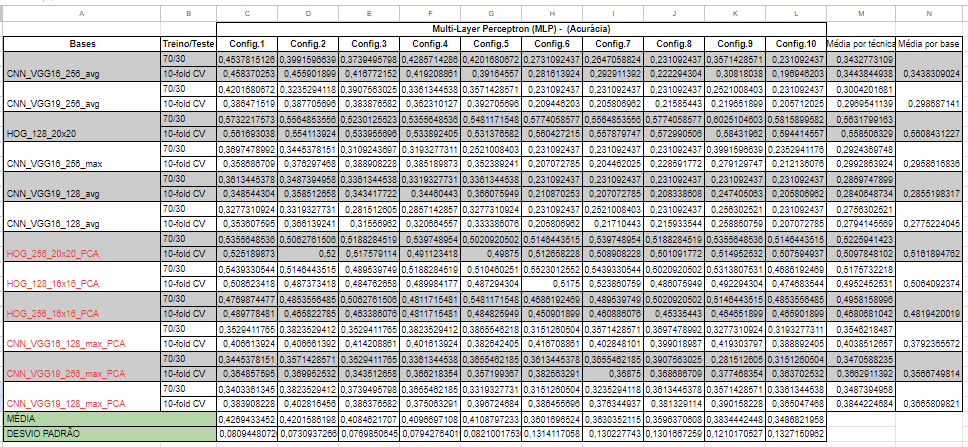